In [1]:
#On  va reprendre l'exemple du Golois

import gym
import numpy as np
env = gym.make('MountainCar-v0')
import matplotlib.pyplot as plt
## evaluate a random (uniform) policfy
lr=[]#liste des récompenses
ll=[]#liste des steps 
for i in range(100):#on lance 100 épisodes 
  env.reset()
  done=False
  rt=0#reward
  el=0#combien de mouvement, de steps?
  while not done:
    s,r,done,_ = env.step(env.action_space.sample())#r=-1 tant qu'on a pas touché le but 
    print(s,r)
    rt +=r#r=reward at this step, rt:accumulated reward 
    el +=1
  lr.append(rt)
  ll.append(el)
print('average length of episodes %.2f (%.2f)'%(np.mean(ll), np.std(ll)))#pour calculer les moyennes 
print('average rewards of episodes %.2f (%.2f)'%(np.mean(lr), np.std(lr)))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[-0.54024291  0.00349682] -1.0
[-0.53662131  0.0036216 ] -1.0
[-0.53290206  0.00371924] -1.0
[-0.52811305  0.00478901] -1.0
[-0.52329019  0.00482287] -1.0
[-0.51946964  0.00382055] -1.0
[-0.51668005  0.00278958] -1.0
[-0.51294236  0.0037377 ] -1.0
[-0.50828457  0.00465779] -1.0
[-0.5047416   0.00354297] -1.0
[-0.50033998  0.00440162] -1.0
[-0.49511266  0.00522732] -1.0
[-0.49009873  0.00501393] -1.0
[-0.48433563  0.0057631 ] -1.0
[-0.47986632  0.00446931] -1.0
[-0.47672406  0.00314226] -1.0
[-0.4749322   0.00179186] -1.0
[-0.47350405  0.00142815] -1.0
[-0.4714502   0.00205385] -1.0
[-0.46878587  0.00266433] -1.0
[-0.46553078  0.00325509] -1.0
[-0.463709    0.00182178] -1.0
[-4.63333990e-01  3.75014912e-04] -1.0
[-0.4644085  -0.00107451] -1.0
[-0.46692461 -0.00251611] -1.0
[-0.46986373 -0.00293912] -1.0
[-0.47420413 -0.00434039] -1.0
[-0.47991362 -0.0057095 ] -1.0
[-0.48694982 -0.0070362 ] -1.0
[-0.49426033 -0

In [2]:
# • domains: list of domains of the attributes
#   ex: [[-1,1],[0,5]] two attributes: first has values in [-1,1], the second in [0,5]
#Omar: first for abscisse and second for velocity
#1tilling=1domain?
# • nbBins: the number of bins of each tiling (here we assume the same number...)
# • nbTiling: the number of tilings used (overlays of tilings)
# • offsets: the offset of each tiling
#   ex: [[0,0], [0.2, 0.4]] example for two attribute: no offset for the first tiling, second is offset by (0.2, 0.4)


'''
Tile coding is a way of representing the values of a vector of continuous variables as a large binary vector with few 1s and many 0s.
The binary vector is not represented explicitly of course, but as a list of the components that are 1s. 
The main step is to partition, or tile, the continuous space multiple times and select one tile from each tiling, 
that corresponding the the vector's value. Each tile is converted (hashed down to) an element in the big binary vector, 
and the list of the tile (element) numbers is returned as the representation of the vector's value. 
It is recommended as a first way of applying online reinforcement learning methods to domains with continuous state or action variables.


'''
def genTilings(domains, nbBins, nbTilings, offsets):
  tilings = []
  for i in range(nbTilings):#here 2
    t = []
    #for each attribute
    for a in range(len(domains)):#we have 2 domains as well
      t.append(genTiling(domains[a], nbBins, offsets[i][a]))#1 TILLING=1LINSPACE=ENSEMBLE DE VALEURS ESPACE du nombre de bins=1 attribut
    tilings.append(t)
    #print("tilings=",tilings)
  return tilings

# generate one tiling
def genTiling(domain, nbBins, offset):
  return np.linspace(start=domain[0], stop=domain[1], num=nbBins, endpoint=True)+offset

# Given the observation, provides the tiles that are active
def encode(observation, tilings):
  code=[]
  # for each tiling
  for i in range(len(tilings)):
    c=[];
    # for each attribute #vitesse- position
    for j in range(len(observation)):
      val = np.digitize(observation[j],tilings[i][j])#np.digitize returns the number of the bins to which the value belongs to 
      c.append(val)
    code.append(c)
    #print("Code =",code)
  return code

domaine des positions:  [-1.2, 0.6]
domaine des vitesses:   [-0.07, 0.07]
tiling  0 : 
-1.12 -0.86 -0.60 -0.34 -0.09 0.17 0.43 0.68 
-0.07 -0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 
tiling  1 : 
-1.03 -0.77 -0.52 -0.26 -0.00 0.25 0.51 0.77 
-0.07 -0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 
tiling  2 : 
-1.17 -0.91 -0.66 -0.40 -0.14 0.11 0.37 0.63 
-0.06 -0.04 -0.02 -0.00 0.02 0.04 0.06 0.08 
tiling  3 : 
-1.09 -0.83 -0.57 -0.32 -0.06 0.20 0.46 0.71 
-0.06 -0.04 -0.02 -0.00 0.02 0.04 0.06 0.08 
tiling  4 : 
-1.00 -0.75 -0.49 -0.23 0.03 0.28 0.54 0.80 
-0.06 -0.04 -0.02 0.00 0.02 0.04 0.06 0.08 
tiling  5 : 
-1.14 -0.89 -0.63 -0.37 -0.12 0.14 0.40 0.66 
-0.06 -0.04 -0.02 0.00 0.02 0.04 0.06 0.08 
tiling  6 : 
-1.06 -0.80 -0.55 -0.29 -0.03 0.23 0.48 0.74 
-0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 0.09 
tiling  7 : 
-1.20 -0.94 -0.69 -0.43 -0.17 0.09 0.34 0.60 
-0.07 -0.05 -0.03 -0.01 0.01 0.03 0.05 0.07 


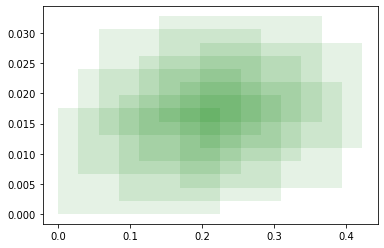

In [3]:
box = env.observation_space
xmax = box.high[0]
vmax = box.high[1]
xmin = box.low[0]
vmin = box.low[1]
domainX = [xmin, xmax]
domainY = [vmin, vmax]
print("domaine des positions: ", domainX)
print("domaine des vitesses:  ", domainY)
#tilings
nbBins = 8
offsets=[]
x=0
y=0
dx=(xmax-xmin)/(nbBins)**2
dy=(vmax-vmin)/(nbBins)**2
for t in range(nbBins):
  x = (x+3)%nbBins
  y = (y+1)%nbBins
  offsets.append([x*dx,y*dy])
tilings = genTilings([domainX,domainY], 8, 8, offsets)
for i in range(nbBins):
  print("tiling ", i , ": ")
  for j in range(nbBins):
    print('%.2f '% tilings[i][0][j],end='')
  print()
  for j in range(nbBins):
    print('%.2f ' % tilings[i][1][j],end='')
  print()

Dx=(xmax-xmin)/nbBins
Dy=(vmax-vmin)/nbBins
for i in range(nbBins):
  #plt.fill(X,Y,color="grey")
  #chaque surface rectangulaire grise correspond à un appel de fill
  #on peut considérer ce plot comme un zoom sur la première portion des tuiles
  plt.fill([offsets[i][0], offsets[i][0]+Dx, offsets[i][0]+Dx, offsets[i][0], offsets[i][0]], [offsets[i][1], offsets[i][1], offsets[i][1]+Dy, offsets[i][1]+Dy,offsets[i][1]],'green',alpha=0.1)


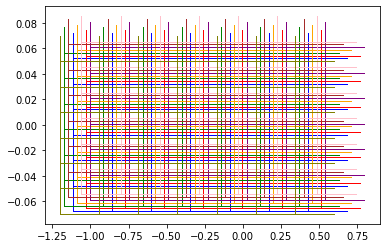

In [4]:
# assumes D only
def plot2DTiling(t, color):
  n = len(t[0])-1
  for i in range(n):
    x=[t[0][i],t[0][i]]
    y=[t[1][0],t[1][n]]
    plt.plot(x,y,c=color,linewidth=1)
    x=[t[0][0],t[0][n]]
    y=[t[1][i],t[1][i]]
    plt.plot(x,y,c=color,linewidth=1)
    
def plot2DTilings(tilings):
  lc = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'olive','cyan']
  for i in range(len(tilings)):
    plot2DTiling(tilings[i], lc[i])
    
plot2DTilings(tilings)
    


In [5]:
def epsGreedy(tilings, w, state, epsilon):
  nbActions = env.action_space.n
  if np.random.rand() < epsilon:
    # explore
    return np.random.randint(0,high=nbActions)
  else:
    #exploit
    #compute the Q values for each action
    nbTilings = len(tilings)
    q=[]
    for a in range(nbActions):#on itére sur nbActions
      val = 0
      for t in range(nbTilings):#ensuite sur le nombre de tilings
          val += w[t][state[t][0],state[t][1],a]#w représente les poids w
          #on somme toutes les récompense pour un épisode
      q.append(val)
    return np.argmax(q)#on renvoie l'indice de l'action correspondant au maximum de la valeur

In [6]:
def Memory_filling(tilings,nbr_episodes,alpha,epsilon,gamma):
  nbActions = env.action_space.n
  nbTilings = len(tilings)
  nbAttributes = len(tilings[0])
  nbBins = len(tilings[0][0])
  numActions = env.action_space
  print('space with ', nbAttributes, ' attributes and ', nbActions, ' actions')
  print('encoded with ', nbTilings, ' tilings with ', nbBins, ' each')
  episodeLength=[]
  episodeReward=[]
  D=[]#Memory
  V_t=[]
  A_t=[]
  A_t_p=[]
  D_t_p=[]
  # initialise Q tables
  w=[]
  for i in range(nbTilings):
    w.append(np.zeros((nbBins, nbBins, nbActions)))

  #let's learn
  for it in range(nbr_episodes):#Répéter éternellement pour chaque épisode
    obs = env.reset()
    s1 = encode(obs, tilings)
    a1 = epsGreedy(tilings, w, s1, epsilon)#on choisit une action avec epsilon-greedy
    done=False
    rt=0
    el=0
    while (not done):#Répète pour chaque étape de l'épisode
      obs, r, done, info = env.step(a1)
      s2 = encode(obs, tilings)
      a2 = epsGreedy(tilings, w, s2, epsilon)
      # q updates
      q1 = 0
      q2 = 0
      # compute estimates Q(s1,a1) and Q(s2,a2)
      # q(s,a) = sum the weights of the active cells.
      for t in range(nbTilings):
        q1 += w[t][s1[t][0],s1[t][1],a1]#a1 est l'ancienne action
        q2 += w[t][s2[t][0],s2[t][1],a2]#a2 est la nouvelle action
      # weight update
      for t in range(nbTilings):
        w[t][s1[t][0],s1[t][1],a1] = w[t][s1[t][0],s1[t][1],a1] + alpha*(r + gamma * q2 - q1)#q2 is equivalent to v and q1 to v chapeau
      # update states and actions
      s1_temp=s1
      a1_temp=a1
      s1 = s2
      a1 = a2#la nouvelle action devient l'ancienne 
      el += 1
      rt += r
      transition=[np.array(s1_temp),a1_temp,rt,np.array(s2)]
      D.append(np.array(s1_temp))
      A_t.append(a1_temp)
      A_t_p.append(a1)
      D_t_p.append(np.array(s1))
      V_t.append(-r)
      
    episodeLength.append(el)
    episodeReward.append(rt)
  return w, episodeLength, episodeReward,np.array(D),np.array(A_t),np.array(V_t),np.array(D_t_p),np.array(A_t_p)


In [7]:
w,episodeLength,episodeReward,my_memory,policies,values,my_memory_p,policies_p=Memory_filling(tilings,100,0.01,0.1,0.99)


space with  2  attributes and  3  actions
encoded with  8  tilings with  8  each


In [8]:
print(values)
print(policies)

[1. 1. 1. ... 1. 1. 1.]
[2 0 2 ... 1 2 2]


In [9]:
my_memory=np.array(my_memory)
print(my_memory.shape)


(19977, 8, 2)


In [10]:
def pick_random_transition(batch_size):
  w_test,episodeLength_test,episodeReward_test,my_memory_test,policies_test,values_test,my_memory_test_p,policies_test_p=Memory_filling(tilings,1000,0.01,0.1,0.99)

  indice = np.random.choice(len(my_memory_test), batch_size, replace=False) 
  transition_aleatoire=[]
  policies=[]
  values=[]
  policies_p=[]
  transition_aleatoire_p=[]

  print(len(indice))
  for idx in range(len(indice)):
    transition_aleatoire.append(my_memory_test[indice[idx]])
    policies.append(policies_test[indice[idx]])
    values.append(values_test[indice[idx]])
    #policies_p.append(policies_test_p[indice[idx]])
    transition_aleatoire_p.append(my_memory_test_p[indice[idx]])



  return np.array(transition_aleatoire),np.array(policies),np.array(values),np.array(transition_aleatoire_p)


In [15]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers 
from tensorflow.keras import regularizers

nb_actions = env.action_space.n
epochs = 200
batch = 60
#*****
alpha=0.01
epsilon=0.1
gamma=0.99
filters=3

def NN_qlearning(input_data,policies,values):
  N =input_data.shape[0]
  input_data = input_data.astype ('float32')
  print(input_data.shape)#add
  policy = np.random.randint(nb_actions, size=(batch,))#choisi une politique aléatoire entre 1 et 3
  policy = keras.utils.to_categorical (policy)
  value = np.random.randint(2, size=(batch,))#gagné ou perdu
  value = value.astype ('float32')
  input = keras.Input(shape=input_data.reshape((input_data.shape[0],input_data.shape[1],input_data.shape[2],1)).shape[1:],batch_size=batch, name='data')
  print("shape input=",input.shape)
  for i in range (4):#pour model résiduel
      x = layers.ReLU()(input)
      x=layers.Dropout(0.10)(x)
      x = layers.BatchNormalization()(x)

  policy_head = layers.Conv2D(1, 3, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(x)
  policy_head = layers.Flatten()(policy_head)
  policy_head = layers.Dense(3, activation='softmax', name="policy",kernel_regularizer=regularizers.l2(0.0008))(policy_head)
  print(type(policy_head))
  print(policy_head.shape)

  
  value_head = layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
  value_head=layers.Dropout(0.10)(value_head)
  value_head = layers.Flatten()(value_head)
  value_head = layers.Dense(1, activation='sigmoid', name='value', kernel_regularizer=regularizers.l2(0.0008))(value_head)

  model = keras.Model(inputs=input, outputs=[policy_head, value_head])
  model.summary ()
  model.compile(optimizer=keras.optimizers.SGD(lr=0.012, momentum=0.95),
                loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
                loss_weights={'policy' : 1.0, 'value' : 1.0},
                metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

  policy=keras.utils.to_categorical(policies)#valeurs d'entraiement
  value=values#valeur d'entraineemntzs
  value = value.astype ('float32')

  policy = tf.convert_to_tensor(policy)
  value=tf.convert_to_tensor(value)


  for i in range (1, epochs + 1):
      print ('epoch ' + str (i))
      input_data,policies,values,input_data_p=pick_random_transition(batch)
      policy=keras.utils.to_categorical(policies)#valeurs d'entraiement
      value=values#valeur d'entraineemntzs
      value = value.astype ('float32')

      policy = tf.convert_to_tensor(policy)
      value=tf.convert_to_tensor(value)
      history = model.fit(input_data,
                          {'policy': policy, 'value': value}, 
                          epochs=1, batch_size=batch)
      if (i % 10 == 0):
          input_data,policies,values,input_data_p=pick_random_transition(batch)
          #input data=St,policies=At,values=rt,policies_p=At+1,input_data_p=St+1
          policy=keras.utils.to_categorical(policies)#valeurs d'entraiement
          value=values#valeur d'entraineemntzs
          value = value.astype ('float32')

          policy = tf.convert_to_tensor(policy)
          value=tf.convert_to_tensor(value)
          val = model.evaluate (input_data,
                                [policy, value], verbose = 0, batch_size=batch)#mse sur les données de validations (su rles données qui n'ont jamais été)
          print ("val =", val)

  model.save ('test.h5')



In [ ]:

NN_qlearning(my_memory,policies,values)


(19977, 8, 2)
shape input= (60, 8, 2, 1)
<class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'>
(60, 3)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(60, 8, 2, 1)]      0                                            
__________________________________________________________________________________________________
re_lu_11 (ReLU)                 (60, 8, 2, 1)        0           data[0][0]                       
__________________________________________________________________________________________________
dropout_13 (Dropout)            (60, 8, 2, 1)        0           re_lu_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (60, 8, 2, 1)        4           dropout_13[

In [ ]:
def deepQN():
  input_data,policies,values=pick_random_transition(1)#on va tirer une transition

  

